In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Unsupervised Learning


Many instances of unsupervised learning, such as dimensionality reduction, manifold learning and feature extraction, find a new representation of the input data without any additional input.

<img src="figures/unsupervised_workflow.svg" width="100%">

The most simple example of this, which can barely be called learning, is rescaling the data to have zero mean and unit variance. This is a helpful preprocessing step for many machine learning models.

Applying such a preprocessing has a very similar interface to the supervised learning algorithms we saw so far.
Let's load the iris dataset and rescale it:

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

(150, 4)


The iris dataset is not "centered" that is it has non-zero mean and the standard deviation is different for each component:


In [3]:
print("mean : %s " % X.mean(axis=0))
print("standard deviation : %s " % X.std(axis=0))

mean : [ 5.84333333  3.054       3.75866667  1.19866667] 
standard deviation : [ 0.82530129  0.43214658  1.75852918  0.76061262] 


To use a preprocessing method, we first import the estimator, here StandardScaler and instantiate it:
    

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

As with the classification and regression algorithms, we call ``fit`` to learn the model from the data. As this is an unsupervised model, we only pass ``X``, not ``y``. This simply estimates mean and standard deviation.

In [5]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we can rescale our data by applying the ``transform`` (not ``predict``) method:

In [6]:
X_scaled = scaler.transform(X)

``X_scaled`` has the same number of samples and features, but the mean was subtracted and all features were scaled to have unit standard deviation:

In [7]:
print(X_scaled.shape)

(150, 4)


In [8]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15] 
standard deviation : [ 1.  1.  1.  1.] 


Principal Component Analysis
============================

An unsupervised transformation that is somewhat more interesting is Principle Component Analysis (PCA).
It is a technique to reduce the dimensionality of the data, by creating a linear projection.
That is, we find new features to represent the data that are a linear combination of the old data (i.e. we rotate it).

The way PCA finds these new directions is by looking for the directions of maximum variance.
Usually only few components that explain most of the variance in the data are kept. To illustrate how a rotation might look like, we first show it on two dimensional data and keep both principal components.

We create a Gaussian blob that is rotated:

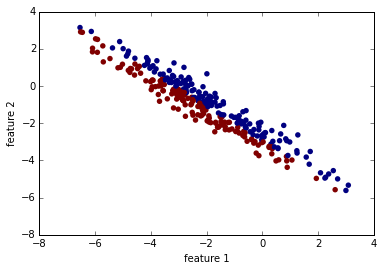

In [9]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

As always, we instantiate our PCA model. By default all directions are kept.

In [10]:
from sklearn.decomposition import PCA
pca = PCA()

Then we fit the PCA model with our data. As PCA is an unsupervised algorithm, there is no output ``y``.

In [11]:
pca.fit(X_blob)

PCA(copy=True, n_components=None, whiten=False)

Then we can transform the data, projected on the principal components:

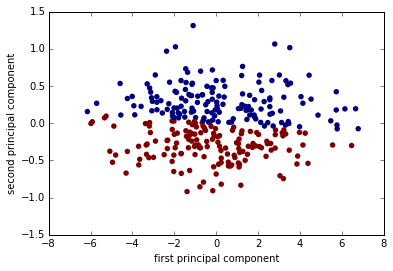

In [12]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

On the left of the plot you can see the four points that were on the top right before. PCA found fit first component to be along the diagonal, and the second to be perpendicular to it. As PCA finds a rotation, the principal components are always at right angles to each other.

Dimensionality Reduction for Visualization with PCA
-------------------------------------------------------------
Consider the digits dataset. It cannot be visualized in a single 2D plot, as it has 64 features. We are going to extract 2 dimensions to visualize it in, using the example from the sklearn examples [here](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html)

Computing PCA projection


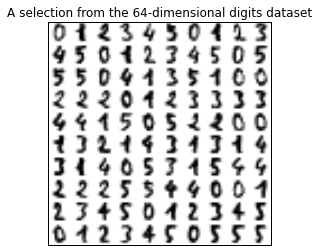

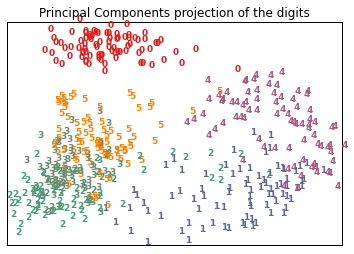

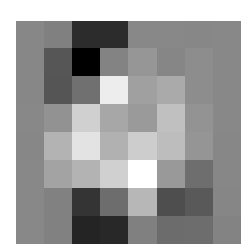

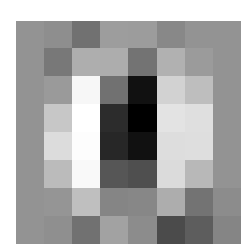

In [13]:
from figures.plot_digits_datasets import digits_plot

digits_plot()

Note that this projection was determined *without* any information about the
labels (represented by the colors): this is the sense in which the learning
is **unsupervised**.  Nevertheless, we see that the projection gives us insight
into the distribution of the different digits in parameter space.

## Manifold Learning

One weakness of PCA is that it cannot detect non-linear features.  A set
of algorithms known as *Manifold Learning* have been developed to address
this deficiency.  A canonical dataset used in Manifold learning is the
*S-curve*, which we briefly saw in an earlier section:

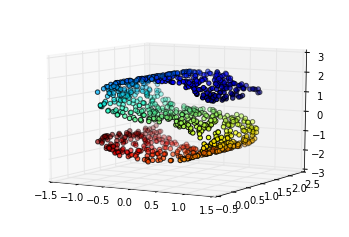

In [14]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -60)

This is a 2-dimensional dataset embedded in three dimensions, but it is embedded
in such a way that PCA cannot discover the underlying data orientation:

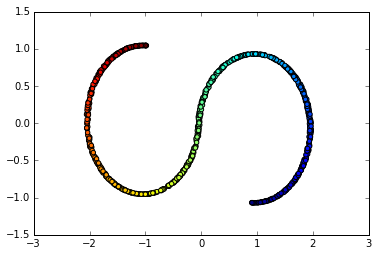

In [15]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

Manifold learning algorithms, however, available in the ``sklearn.manifold``
submodule, are able to recover the underlying 2-dimensional manifold:

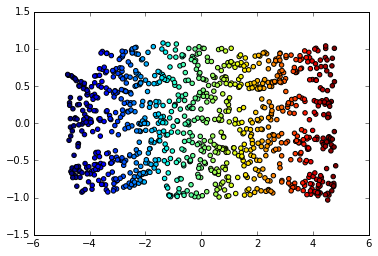

In [16]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y)

##Exercise
Compare the results of Isomap and  PCA on a 5-class subset of the digits dataset (``load_digits(5)``).

__Bonus__: Also compare to TSNE, another popular manifold learning technique.

In [17]:
from sklearn.datasets import load_digits

digits = load_digits(5)

X = digits.data
# ...